## ___Feature Selection with Wrapper Method___

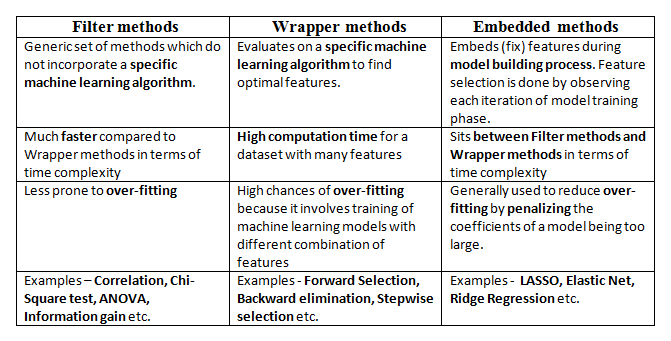

_In wrapper methods, the feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset._

_It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The evaluation criterion is simply the performance measure which depends on the type of problem, for eg. for regression evaluation criterion can be p-values, R-squared, Adjusted R-squared, similarly for classification the evaluation criterion can be accuracy, precision, recall, f1-score, etc. Finally, it selects the combination of features that gives the optimal results for the specified machine learning algorithm._

_Most commonly used techniques under wrapper methods are:_
* ___Forward selection___
* ___Backward elimination (Recursive Feature Selection)___
* ___Stepwise Selection (Bi-directional elimination/ Exhaustive Feature Selection)___

In [2]:
pip install mlxtend

  Using cached mlxtend-0.17.2-py2.py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


_Sequential Feature selection algorithms are family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to k-dimensional feature subspace, where k<d._

_There are 4 different flavors of SFAs:_
* ___Sequential Forward Selection (SFS)___
* ___Sequential Backward Selection (SBS)___
* ___Sequential Forward Floating Selection (SFFS)___
* ___Sequential Backward Floating Selection (SBFS)___



In [3]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score

In [1]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [8]:
from sklearn.datasets import load_wine

In [9]:
data = load_wine()

In [10]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [12]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [23]:
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

In [24]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [25]:
X_train,X_test,y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.2)
X_train.shape,X_test.shape

((142, 13), (36, 13))

In [26]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0
94,11.62,1.99,2.28,18.0,98.0,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0


### ___Step Forward Feature Selection (SFS)___

In [51]:
sfs = SFS(RandomForestClassifier(n_estimators =100, n_jobs=-1, random_state = 0),
          k_features= (1,13),
          forward= True,
          floating= False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1          
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   10.8s finished

[2020-05-29 20:53:38] Features: 1/13 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.3s finished

[2020-05-29 20:53:46] Features: 2/13 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    7.9s finished

[2020-05-29 20:53:54] Features: 3/13 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.9s finished

[2020-05-29 20:54:02] Features: 4/13 -- score: 0.97

In [52]:
sfs.k_feature_names_

('alcohol',
 'ash',
 'magnesium',
 'flavanoids',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline')

In [53]:
sfs.k_feature_idx_

(0, 2, 4, 6, 8, 9, 10, 11, 12)

In [54]:
sfs.k_score_

0.9861111111111112

In [55]:
sfs.get_metric_dict()

{1: {'feature_idx': (6,),
  'cv_scores': array([0.72222222, 0.83333333, 0.74285714, 0.77142857]),
  'avg_score': 0.7674603174603174,
  'feature_names': ('flavanoids',),
  'ci_bound': 0.0670900959740084,
  'std_dev': 0.04185332340773084,
  'std_err': 0.024164027535933864},
 2: {'feature_idx': (6, 9),
  'cv_scores': array([0.94444444, 1.        , 0.97142857, 0.97142857]),
  'avg_score': 0.9718253968253968,
  'feature_names': ('flavanoids', 'color_intensity'),
  'ci_bound': 0.031491951844516315,
  'std_dev': 0.019645863165851696,
  'std_err': 0.01134254438726703},
 3: {'feature_idx': (4, 6, 9),
  'cv_scores': array([0.97222222, 1.        , 0.97142857, 1.        ]),
  'avg_score': 0.9859126984126985,
  'feature_names': ('magnesium', 'flavanoids', 'color_intensity'),
  'ci_bound': 0.022586160577997973,
  'std_dev': 0.014090095855223014,
  'std_err': 0.008134920634920637},
 4: {'feature_idx': (4, 6, 9, 12),
  'cv_scores': array([0.97222222, 0.97222222, 0.97142857, 1.        ]),
  'avg_score'

In [56]:
Scores = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
Scores

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.7222222222222222, 0.8333333333333334, 0.742...",0.76746,"(flavanoids,)",0.0670901,0.0418533,0.024164
2,"(6, 9)","[0.9444444444444444, 1.0, 0.9714285714285714, ...",0.971825,"(flavanoids, color_intensity)",0.031492,0.0196459,0.0113425
3,"(4, 6, 9)","[0.9722222222222222, 1.0, 0.9714285714285714, ...",0.985913,"(magnesium, flavanoids, color_intensity)",0.0225862,0.0140901,0.00813492
4,"(4, 6, 9, 12)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(magnesium, flavanoids, color_intensity, proline)",0.0194714,0.012147,0.00701308
5,"(2, 4, 6, 9, 12)","[0.9444444444444444, 0.9722222222222222, 0.971...",0.972024,"(ash, magnesium, flavanoids, color_intensity, ...",0.0314903,0.0196449,0.011342
6,"(2, 4, 6, 8, 9, 12)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(ash, magnesium, flavanoids, proanthocyanins, ...",0.0194714,0.012147,0.00701308
7,"(0, 2, 4, 6, 8, 9, 12)","[0.9444444444444444, 0.9722222222222222, 1.0, ...",0.979167,"(alcohol, ash, magnesium, flavanoids, proantho...",0.0369201,0.0230321,0.0132976
8,"(0, 2, 4, 6, 8, 9, 11, 12)","[0.9444444444444444, 0.9722222222222222, 1.0, ...",0.979167,"(alcohol, ash, magnesium, flavanoids, proantho...",0.0369201,0.0230321,0.0132976
9,"(0, 2, 4, 6, 8, 9, 10, 11, 12)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(alcohol, ash, magnesium, flavanoids, proantho...",0.0222636,0.0138889,0.00801875
10,"(0, 1, 2, 4, 6, 8, 9, 10, 11, 12)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(alcohol, malic_acid, ash, magnesium, flavanoi...",0.0222636,0.0138889,0.00801875


In [57]:
Scores[Scores.avg_score == max(Scores.avg_score)]

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
9,"(0, 2, 4, 6, 8, 9, 10, 11, 12)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(alcohol, ash, magnesium, flavanoids, proantho...",0.0222636,0.0138889,0.00801875
10,"(0, 1, 2, 4, 6, 8, 9, 10, 11, 12)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(alcohol, malic_acid, ash, magnesium, flavanoi...",0.0222636,0.0138889,0.00801875
12,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(alcohol, malic_acid, ash, alcalinity_of_ash, ...",0.0222636,0.0138889,0.00801875


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b601f15608>)

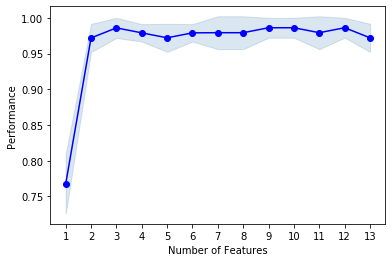

In [71]:
plot_sfs(sfs.get_metric_dict(), kind = 'std_dev')

### ___Step Backward Feature Selection (SBS)___

In [58]:
sbs = SFS(RandomForestClassifier(n_estimators =100, n_jobs=-1, random_state = 0),
          k_features= (1,13),
          forward= False,
          floating= False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1          
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   10.4s finished

[2020-05-29 20:55:16] Features: 12/1 -- score: 0.9861111111111112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.1s finished

[2020-05-29 20:55:25] Features: 11/1 -- score: 0.9861111111111112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    7.7s finished

[2020-05-29 20:55:32] Features: 10/1 -- score: 0.9791666666666666[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.3s finished

[2020-05-29 20:55:41] Features: 9/1 -- score: 0.986

In [59]:
sbs.k_feature_names_

('alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'proline')

In [60]:
Scores = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
Scores

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.9444444444444444, 0.9722222222222222, 1.0, ...",0.972024,"(alcohol, malic_acid, ash, alcalinity_of_ash, ...",0.0314903,0.0196449,0.011342
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(alcohol, malic_acid, ash, alcalinity_of_ash, ...",0.0222636,0.0138889,0.00801875
11,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(alcohol, malic_acid, ash, alcalinity_of_ash, ...",0.0222636,0.0138889,0.00801875
10,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 12)","[0.9444444444444444, 0.9722222222222222, 1.0, ...",0.979167,"(alcohol, malic_acid, ash, alcalinity_of_ash, ...",0.0369201,0.0230321,0.0132976
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(alcohol, malic_acid, ash, alcalinity_of_ash, ...",0.0222636,0.0138889,0.00801875
8,"(0, 1, 2, 3, 4, 6, 7, 9)","[0.9722222222222222, 1.0, 1.0, 0.9714285714285...",0.985913,"(alcohol, malic_acid, ash, alcalinity_of_ash, ...",0.0225862,0.0140901,0.00813492
7,"(0, 1, 2, 3, 4, 6, 9)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.978968,"(alcohol, malic_acid, ash, alcalinity_of_ash, ...",0.0194714,0.012147,0.00701308
6,"(0, 2, 3, 4, 6, 9)","[0.9722222222222222, 1.0, 0.9714285714285714, ...",0.985913,"(alcohol, ash, alcalinity_of_ash, magnesium, f...",0.0225862,0.0140901,0.00813492
5,"(0, 2, 4, 6, 9)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(alcohol, ash, magnesium, flavanoids, color_in...",0.0194714,0.012147,0.00701308
4,"(0, 2, 6, 9)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.971825,"(alcohol, ash, flavanoids, color_intensity)",0.000636104,0.000396825,0.000229107


In [61]:
Scores[Scores.avg_score == max(Scores.avg_score)]

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(alcohol, malic_acid, ash, alcalinity_of_ash, ...",0.0222636,0.0138889,0.00801875
11,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(alcohol, malic_acid, ash, alcalinity_of_ash, ...",0.0222636,0.0138889,0.00801875
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(alcohol, malic_acid, ash, alcalinity_of_ash, ...",0.0222636,0.0138889,0.00801875


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b602605b48>)

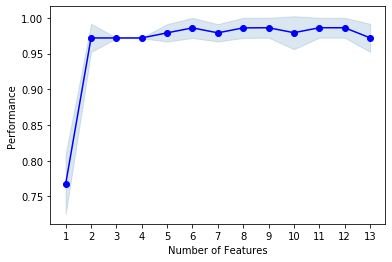

In [70]:
plot_sfs(sbs.get_metric_dict(), kind = 'std_dev')

### ___Exhaustive Feature Selection (EFS)___

In [62]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# most expensive feature selection

In [63]:
efs = EFS(RandomForestClassifier(n_estimators =100, n_jobs=-1, random_state = 0),
          min_features=4,
          max_features=5,
          scoring= 'accuracy',
          cv = None,
          n_jobs= -1          
         ).fit(X_train, y_train)

Features: 2002/2002

In [64]:
help(efs)

Help on ExhaustiveFeatureSelector in module mlxtend.feature_selection.exhaustive_feature_selector object:

class ExhaustiveFeatureSelector(sklearn.base.BaseEstimator, sklearn.base.MetaEstimatorMixin)
 |  ExhaustiveFeatureSelector(estimator, min_features=1, max_features=1, print_progress=True, scoring='accuracy', cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True)
 |  
 |  Exhaustive Feature Selection for Classification and Regression.
 |     (new in v0.4.3)
 |  
 |  Parameters
 |  ----------
 |  estimator : scikit-learn classifier or regressor
 |  min_features : int (default: 1)
 |      Minumum number of features to select
 |  max_features : int (default: 1)
 |      Maximum number of features to select
 |  print_progress : bool (default: True)
 |      Prints progress as the number of epochs
 |      to stderr.
 |  scoring : str, (default='accuracy')
 |      Scoring metric in {accuracy, f1, precision, recall, roc_auc}
 |      for classifiers,
 |      {'mean_absolute_error', 'm

In [65]:
efs.best_score_

1.0

In [66]:
efs.best_feature_names_

('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash')

In [67]:
efs.best_idx_

(0, 1, 2, 3)

In [68]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b6018db388>)

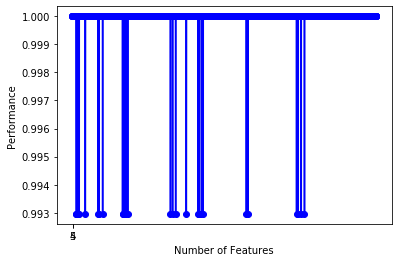

In [69]:
plot_sfs(efs.get_metric_dict(), kind = 'std_dev')